In [ ]:
'''Extrae el archivo zip del dataset'''
import zipfile
with zipfile.ZipFile('/content/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
'''Importar las librerias'''
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img

%matplotlib inline

In [ ]:
!pip install split-folders
'''Para entrenar los datos 60 en 20 y 20'''
import splitfolders
splitfolders.ratio('./dataset', output="output", seed=1337, ratio=(.6, 0.2,0.2)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 4000 files [00:00, 7640.69 files/s]


In [ ]:
'''Para preprocesar los datos con keras'''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(128, 128),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(128, 128),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(128, 128),
batch_size=64
)

Found 2400 files belonging to 7 classes.
Found 800 files belonging to 7 classes.
Found 800 files belonging to 7 classes.


In [ ]:
'''Clases de arroz'''
class_names = train_ds.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag', 'test', 'training']


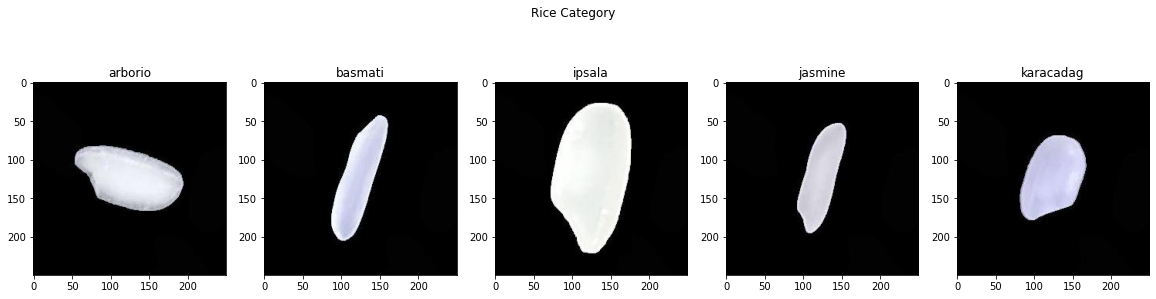

In [ ]:
'''Para crear la figura'''
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
'''Para tomar los tipos de datos para predecir'''
arborio_img = img.imread('./dataset/Arborio/Arborio (201).jpg')
basmati_img = img.imread('./dataset//Basmati/basmati (201).jpg')
ipsala_img = img.imread('./dataset/Ipsala/Ipsala (201).jpg')
jasmine_img = img.imread('./dataset/Jasmine/Jasmine (201).jpg')
karacadag_img = img.imread('./dataset/Karacadag/Karacadag (201).jpg')

'''Poner nombres a las imagenes'''
ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')
'''Ejecutar las imagenes de los tipos de arroz'''
ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

In [ ]:
'''se crea la capas con keras de forma secuencial '''
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3), input_shape=(128,128,1),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
'''se crea la capas con keras de forma secuencial '''
model.add(keras.layers.Dropout(0.20))
'''se crea la capas con keras de forma secuencial '''
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
'''se crea la capas para el entrenamiento '''
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(30,"softmax"))
model.add(keras.layers.Dense(5,"softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "RMSprop",metrics=["accuracy"])

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=10, batch_size=64, verbose=1)

Epoch 1/10
38/38 [==============================] - 133s 3s/step - loss: 1.4755 - accuracy: 0.4829 - val_loss: 1.5938 - val_accuracy: 0.2350
Epoch 2/10
38/38 [==============================] - 129s 3s/step - loss: 1.3886 - accuracy: 0.5871 - val_loss: 1.6409 - val_accuracy: 0.2000
Epoch 3/10
38/38 [==============================] - 141s 4s/step - loss: 1.3596 - accuracy: 0.5808 - val_loss: 1.6439 - val_accuracy: 0.2000
Epoch 4/10
 8/38 [=====>........................] - ETA: 1:32 - loss: 1.3448 - accuracy: 0.5938

In [ ]:
'''Se muestra el resumen del modelo'''
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0

# History

In [ ]:
'''El historial de las metricas'''
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

In [ ]:
'''Evaluar el modelo'''
loss, accuracy = model.evaluate(test_ds)

13/13 [==============================] - 19s 825ms/step - loss: 1.1246 - accuracy: 0.6363


1/1 [==============================] - 0s 61ms/step


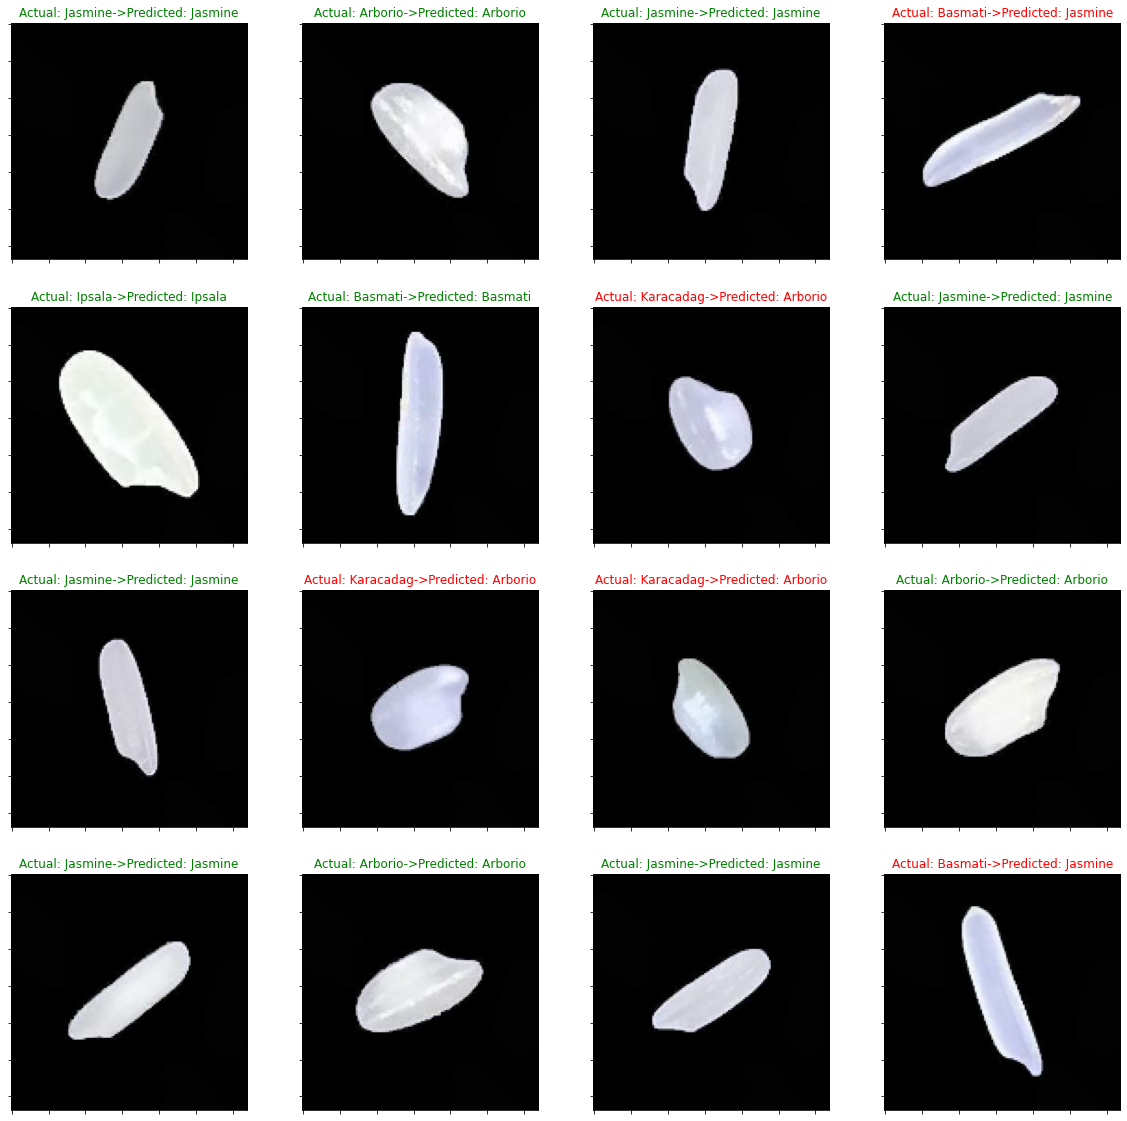

In [ ]:
'''Se crea las graficas de las capas de la prediccion'''
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        '''Se muestra las graficas con la prediccion'''
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

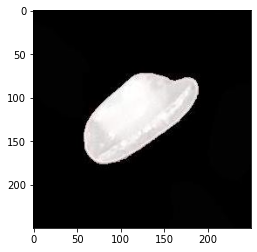

In [ ]:
data='./dataset'
import cv2
for category in class_names:
    path=os.path.join(data, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break